In [6]:
import sys, os

# Add project_root to sys.path so Python can find `scripts/`
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [7]:
from scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.pipelines import change_model
from scripts.predict import future_change_prediction
from scripts.lstm import FeatureSelfAttnLSTM
from scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch.nn as nn

In [8]:
scaler = StandardScaler()
model_type = FeatureSelfAttnLSTM
criterion = nn.MSELoss()

In [9]:
# 📂 Load dataset
file_path_1 = "../ready_data/change_vn_index.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1)

Overall Average Training Loss: 0.9437
Final Evaluation Loss on Test Set: 0.9450
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-04         -0.001352         0.0124
1   2023-08-07          0.002267         0.0126
2   2023-08-08          0.002634         0.0007
3   2023-08-09          0.000338        -0.0066
4   2023-08-10         -0.000427        -0.0108
..         ...               ...            ...
420 2025-04-14          0.012131         0.0155
421 2025-04-15          0.003182        -0.0110
422 2025-04-16          0.000707        -0.0142
423 2025-04-17          0.001817         0.0057
424 2025-04-18          0.004079         0.0015

[425 rows x 3 columns]
RMSE: 13.5484, MAE: 8.9621, R²: 0.9564, Directional Accuracy: 0.5341


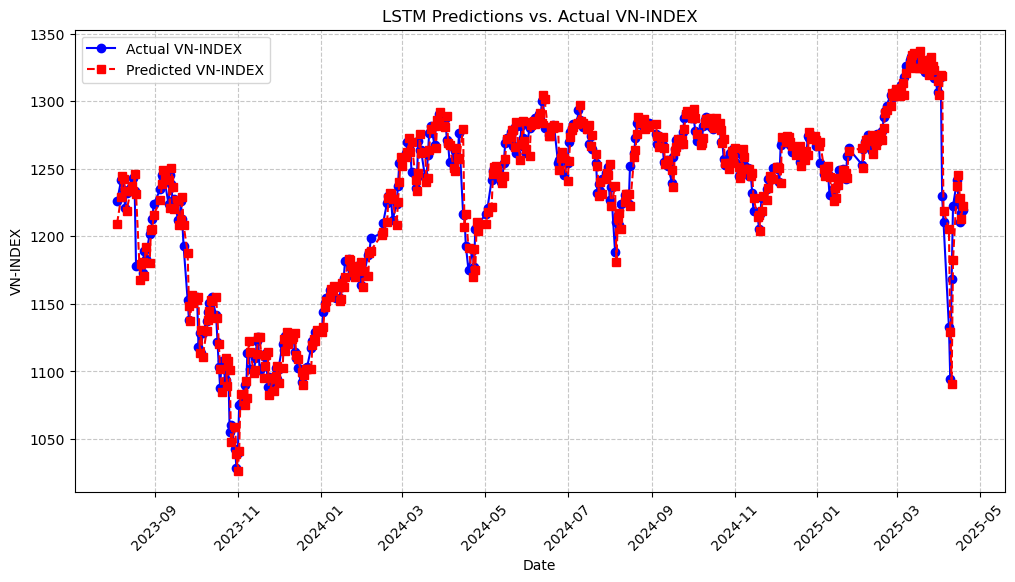

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-04          1225.98         1209.312691
1   2023-08-07          1241.42         1228.758861
2   2023-08-08          1242.23         1244.689418
3   2023-08-09          1233.99         1242.650308
4   2023-08-10          1220.61         1233.462839
..         ...              ...                 ...
420 2025-04-14          1241.44         1237.289345
421 2025-04-15          1227.79         1245.389894
422 2025-04-16          1210.30         1228.657481
423 2025-04-17          1217.25         1212.498690
424 2025-04-18          1219.12         1222.214991

[425 rows x 3 columns]


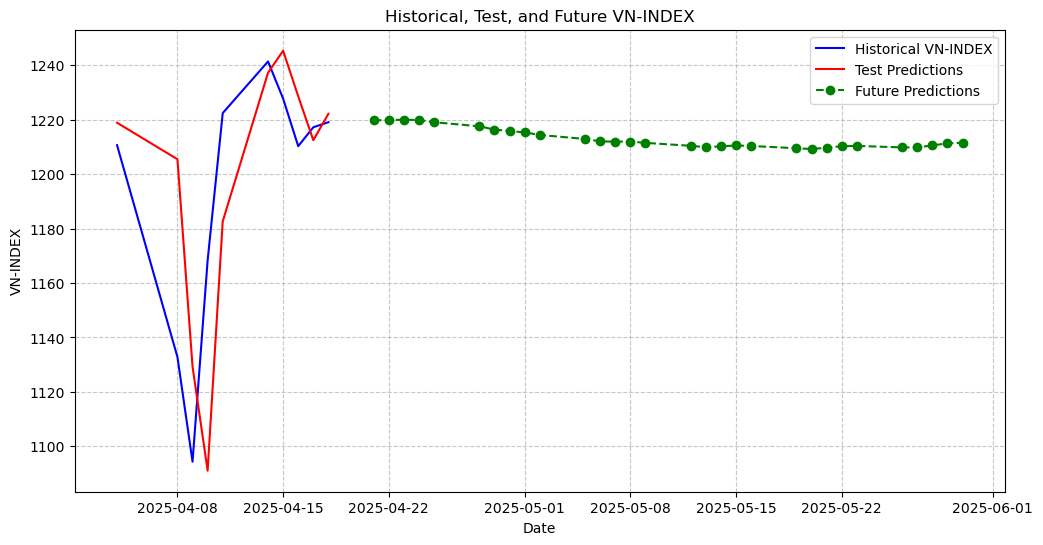

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1219.841587          0.000592
1  2025-04-22         1219.870270          0.000024
2  2025-04-23         1220.025296          0.000127
3  2025-04-24         1219.914109         -0.000091
4  2025-04-25         1219.110174         -0.000659
5  2025-04-28         1217.602061         -0.001237
6  2025-04-29         1216.406255         -0.000982
7  2025-04-30         1215.862177         -0.000447
8  2025-05-01         1215.375136         -0.000401
9  2025-05-02         1214.429095         -0.000778
10 2025-05-05         1212.947521         -0.001220
11 2025-05-06         1212.056934         -0.000734
12 2025-05-07         1211.977179         -0.000066
13 2025-05-08         1211.989111          0.000010
14 2025-05-09         1211.514911         -0.000391
15 2025-05-12         1210.439409         -0.000888
16 2025-05-13         1209.936393         -0.000416
17 2025-05-14         1210.218729          0.000233
18 2025-05-1

In [10]:
# 📊 Select only VN-INDEX for prediction
data = df_1[["Change", 'dow_sin', 'dow_cos',
        'month_sin', 'month_cos']]

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_1)

Overall Average Training Loss: 0.9368
Final Evaluation Loss on Test Set: 0.9355
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-04          0.000050         0.0124
1   2023-08-07         -0.001934         0.0126
2   2023-08-08         -0.000130         0.0007
3   2023-08-09          0.002363        -0.0066
4   2023-08-10          0.002250        -0.0108
..         ...               ...            ...
420 2025-04-14         -0.002604         0.0155
421 2025-04-15          0.002291        -0.0110
422 2025-04-16          0.004713        -0.0142
423 2025-04-17          0.004104         0.0057
424 2025-04-18          0.003680         0.0015

[425 rows x 3 columns]
RMSE: 13.4943, MAE: 8.9707, R²: 0.9568, Directional Accuracy: 0.5412


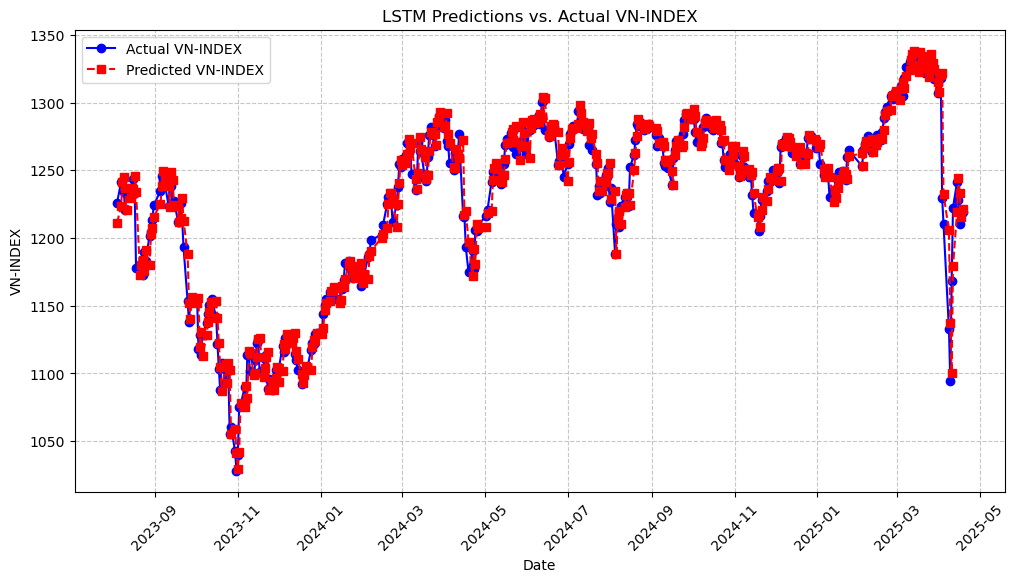

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-04          1225.98         1211.010641
1   2023-08-07          1241.42         1223.608394
2   2023-08-08          1242.23         1241.258046
3   2023-08-09          1233.99         1245.165180
4   2023-08-10          1220.61         1236.766050
..         ...              ...                 ...
420 2025-04-14          1241.44         1219.276609
421 2025-04-15          1227.79         1244.283871
422 2025-04-16          1210.30         1233.576211
423 2025-04-17          1217.25         1215.266857
424 2025-04-18          1219.12         1221.729574

[425 rows x 3 columns]


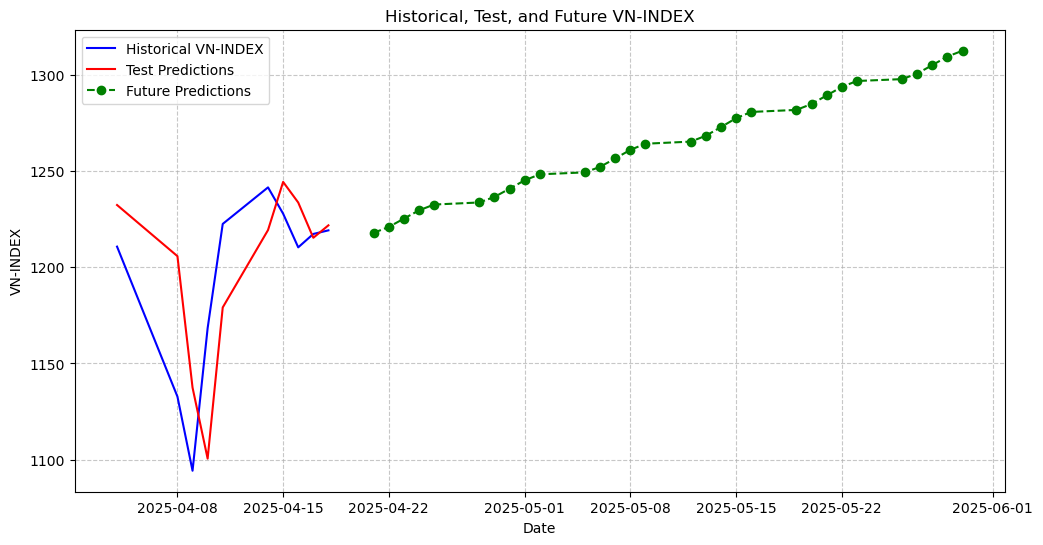

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1217.842165         -0.001048
1  2025-04-22         1220.881282          0.002495
2  2025-04-23         1225.216291          0.003551
3  2025-04-24         1229.500525          0.003497
4  2025-04-25         1232.526333          0.002461
5  2025-04-28         1233.603104          0.000874
6  2025-04-29         1236.494378          0.002344
7  2025-04-30         1240.757569          0.003448
8  2025-05-01         1245.112986          0.003510
9  2025-05-02         1248.218896          0.002494
10 2025-05-05         1249.235223          0.000814
11 2025-05-06         1252.123795          0.002312
12 2025-05-07         1256.465167          0.003467
13 2025-05-08         1260.926908          0.003551
14 2025-05-09         1264.105463          0.002521
15 2025-05-12         1265.207053          0.000871
16 2025-05-13         1268.243027          0.002400
17 2025-05-14         1272.742993          0.003548
18 2025-05-1

In [11]:
# 📊 Select additional VN-INDEX statistics for prediction
data = df_1

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_1)

Overall Average Training Loss: 0.9304
Final Evaluation Loss on Test Set: 0.8235
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-08          0.002744         0.0007
1   2023-08-09          0.001283        -0.0066
2   2023-08-10          0.000682        -0.0108
3   2023-08-11         -0.001239         0.0095
4   2023-08-14          0.000252         0.0038
..         ...               ...            ...
418 2025-04-14          0.015082         0.0155
419 2025-04-15         -0.000381        -0.0110
420 2025-04-16          0.001158        -0.0142
421 2025-04-17          0.001208         0.0057
422 2025-04-18          0.000129         0.0015

[423 rows x 3 columns]
RMSE: 13.3304, MAE: 8.8678, R²: 0.9580, Directional Accuracy: 0.5083


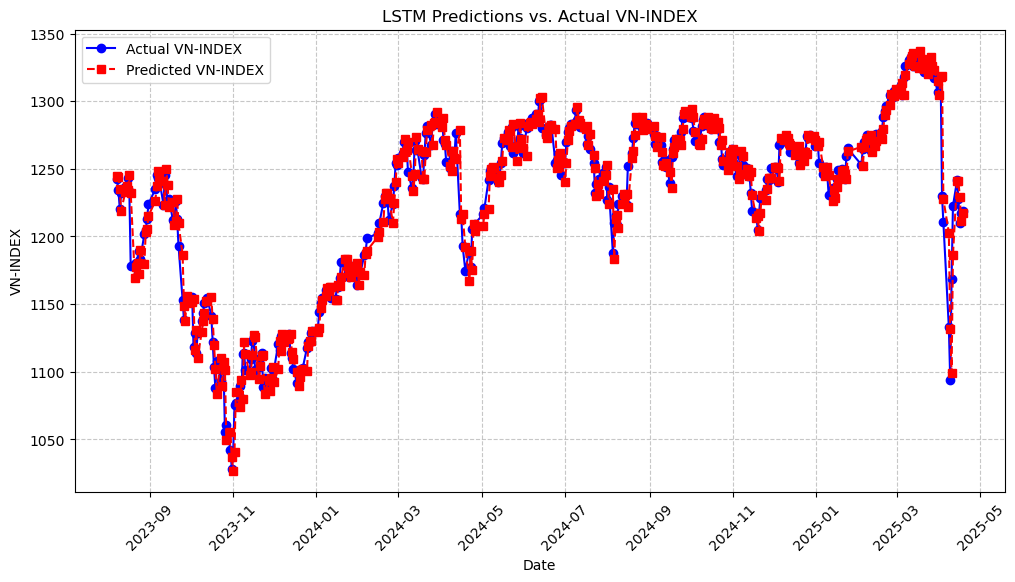

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-08          1242.23         1244.826442
1   2023-08-09          1233.99         1243.824104
2   2023-08-10          1220.61         1234.831527
3   2023-08-11          1232.21         1219.097393
4   2023-08-14          1236.84         1232.520761
..         ...              ...                 ...
418 2025-04-14          1241.44         1240.897638
419 2025-04-15          1227.79         1240.967451
420 2025-04-16          1210.30         1229.211544
421 2025-04-17          1217.25         1211.761585
422 2025-04-18          1219.12         1217.406572

[423 rows x 3 columns]


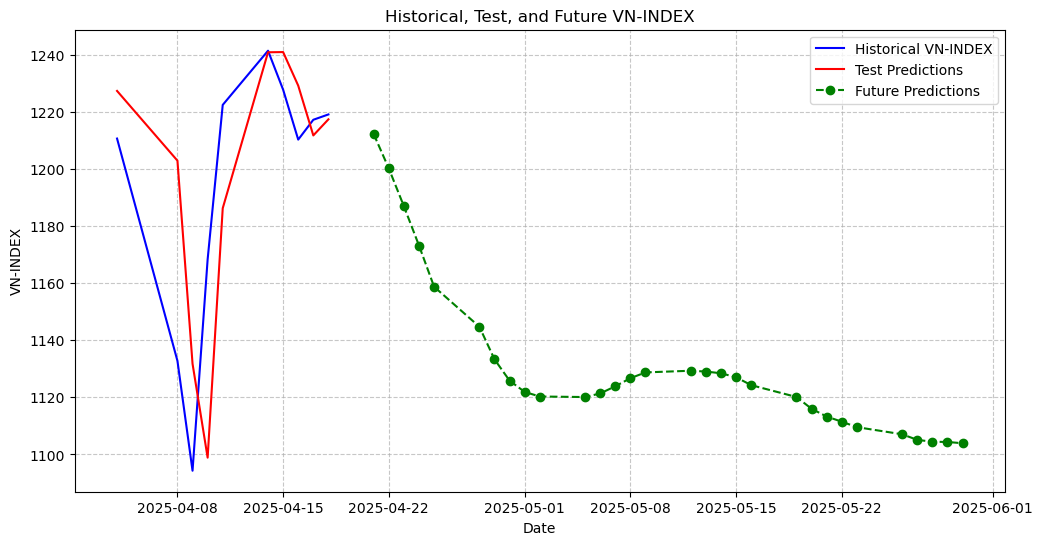

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1212.221060         -0.005659
1  2025-04-22         1200.194057         -0.009921
2  2025-04-23         1186.942769         -0.011041
3  2025-04-24         1173.183307         -0.011592
4  2025-04-25         1158.760549         -0.012294
5  2025-04-28         1144.735382         -0.012104
6  2025-04-29         1133.327955         -0.009965
7  2025-04-30         1125.856542         -0.006592
8  2025-05-01         1121.896667         -0.003517
9  2025-05-02         1120.299439         -0.001424
10 2025-05-05         1120.111973         -0.000167
11 2025-05-06         1121.363364          0.001117
12 2025-05-07         1123.883968          0.002248
13 2025-05-08         1126.704554          0.002510
14 2025-05-09         1128.744368          0.001810
15 2025-05-12         1129.328948          0.000518
16 2025-05-13         1129.047169         -0.000250
17 2025-05-14         1128.439769         -0.000538
18 2025-05-1

In [12]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1[["Change", 'dow_sin', 'dow_cos',
        'month_sin', 'month_cos']], ['Change'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_1)

Overall Average Training Loss: 0.9283
Final Evaluation Loss on Test Set: 0.9542
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-08          0.004658         0.0007
1   2023-08-09          0.002516        -0.0066
2   2023-08-10          0.001485        -0.0108
3   2023-08-11         -0.000997         0.0095
4   2023-08-14         -0.002768         0.0038
..         ...               ...            ...
418 2025-04-14         -0.008374         0.0155
419 2025-04-15          0.002717        -0.0110
420 2025-04-16          0.002969        -0.0142
421 2025-04-17         -0.000628         0.0057
422 2025-04-18         -0.005338         0.0015

[423 rows x 3 columns]
RMSE: 13.4489, MAE: 8.9736, R²: 0.9573, Directional Accuracy: 0.5296


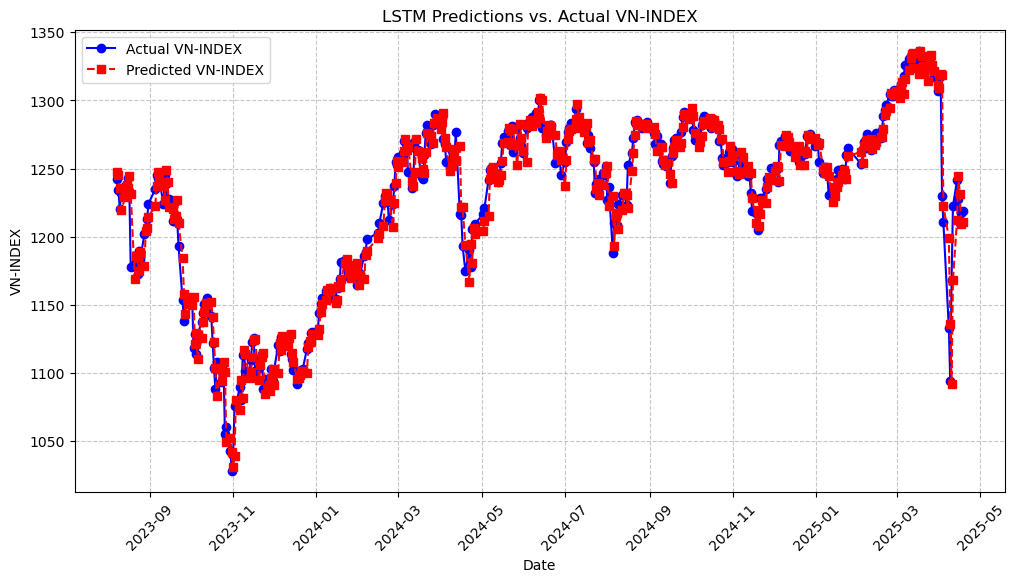

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-08          1242.23         1247.202735
1   2023-08-09          1233.99         1245.355627
2   2023-08-10          1220.61         1235.822388
3   2023-08-11          1232.21         1219.393320
4   2023-08-14          1236.84         1228.799333
..         ...              ...                 ...
418 2025-04-14          1241.44         1212.223727
419 2025-04-15          1227.79         1244.813248
420 2025-04-16          1210.30         1231.435767
421 2025-04-17          1217.25         1209.540061
422 2025-04-18          1219.12         1210.752594

[423 rows x 3 columns]


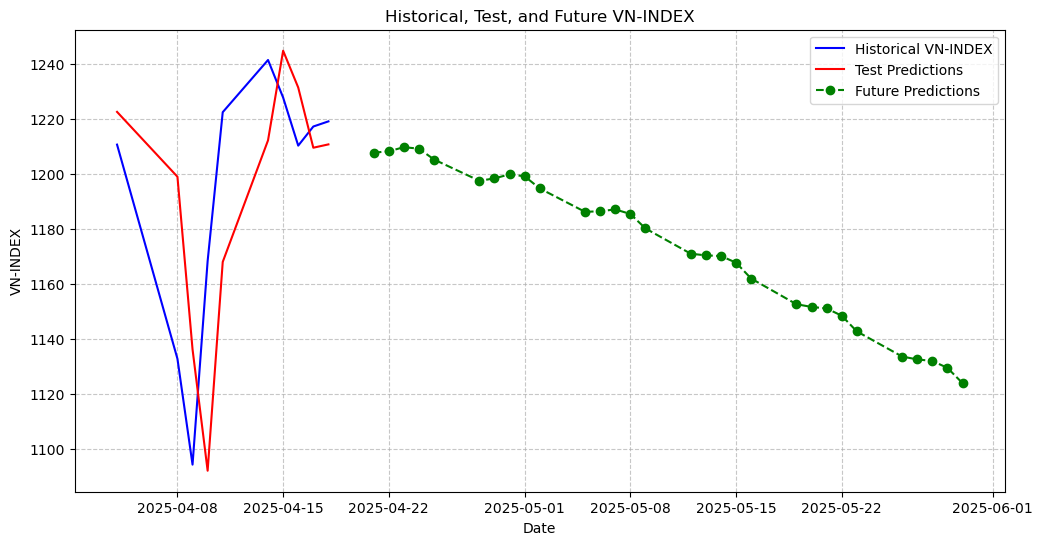

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1207.733105         -0.009340
1  2025-04-22         1208.246364          0.000425
2  2025-04-23         1209.736746          0.001234
3  2025-04-24         1209.188268         -0.000453
4  2025-04-25         1205.242081         -0.003264
5  2025-04-28         1197.517615         -0.006409
6  2025-04-29         1198.381925          0.000722
7  2025-04-30         1199.871975          0.001243
8  2025-05-01         1199.135035         -0.000614
9  2025-05-02         1194.724048         -0.003678
10 2025-05-05         1186.215958         -0.007121
11 2025-05-06         1186.448626          0.000196
12 2025-05-07         1187.096764          0.000546
13 2025-05-08         1185.445652         -0.001391
14 2025-05-09         1180.181618         -0.004441
15 2025-05-12         1171.000424         -0.007779
16 2025-05-13         1170.391156         -0.000520
17 2025-05-14         1170.158918         -0.000198
18 2025-05-1

In [13]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, ['Change'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_1)

/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_EMA_26'] = copy_df[col].ewm(span=26, adjust=False).mean()
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_MACD'] = copy_df[f'{col}_EMA_12'] - copy_df[f'{col}_EMA_26']
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:66: PerformanceWarning: DataFrame is highly fragment

Overall Average Training Loss: 0.8946
Final Evaluation Loss on Test Set: 1.1475
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-08         -0.007061         0.0007
1   2023-08-09         -0.012874        -0.0066
2   2023-08-10         -0.011086        -0.0108
3   2023-08-11         -0.008586         0.0095
4   2023-08-14         -0.003872         0.0038
..         ...               ...            ...
418 2025-04-14         -0.011852         0.0155
419 2025-04-15         -0.012637        -0.0110
420 2025-04-16         -0.001848        -0.0142
421 2025-04-17         -0.004220         0.0057
422 2025-04-18         -0.010703         0.0015

[423 rows x 3 columns]
RMSE: 15.5580, MAE: 10.5547, R²: 0.9428, Directional Accuracy: 0.5035


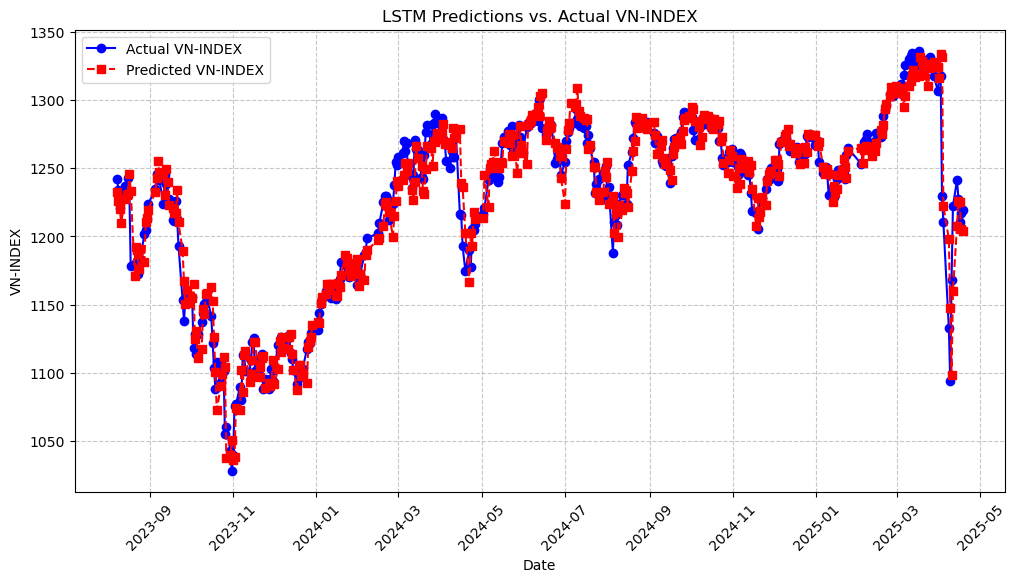

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-08          1242.23         1232.654787
1   2023-08-09          1233.99         1226.237320
2   2023-08-10          1220.61         1220.310134
3   2023-08-11          1232.21         1210.129398
4   2023-08-14          1236.84         1227.438753
..         ...              ...                 ...
418 2025-04-14          1241.44         1207.971372
419 2025-04-15          1227.79         1225.751620
420 2025-04-16          1210.30         1225.521230
421 2025-04-17          1217.25         1205.192275
422 2025-04-18          1219.12         1204.221246

[423 rows x 3 columns]


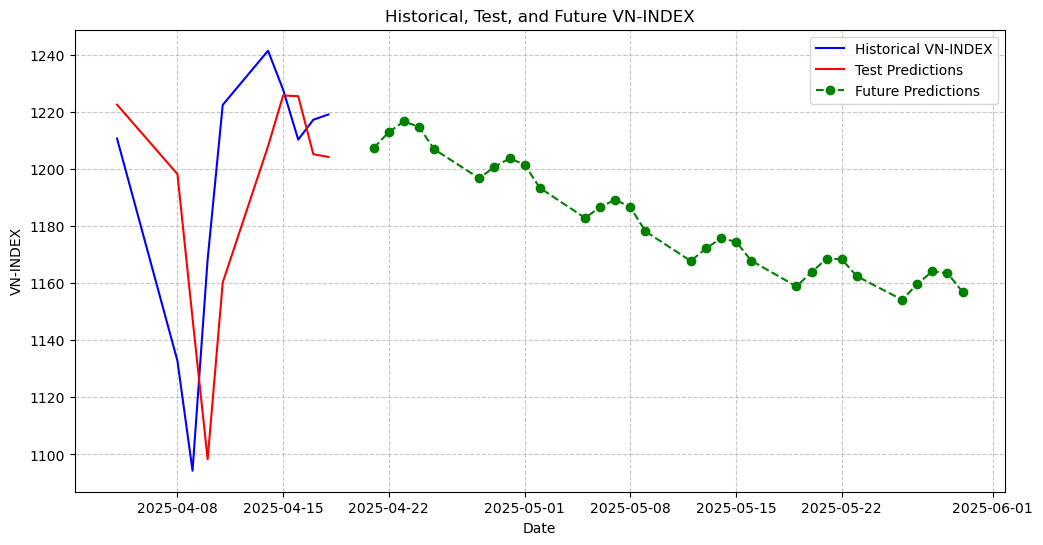

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1207.369860         -0.009638
1  2025-04-22         1212.938675          0.004612
2  2025-04-23         1216.653614          0.003063
3  2025-04-24         1214.773647         -0.001545
4  2025-04-25         1206.919442         -0.006466
5  2025-04-28         1196.729406         -0.008443
6  2025-04-29         1200.773470          0.003379
7  2025-04-30         1203.729363          0.002462
8  2025-05-01         1201.544059         -0.001815
9  2025-05-02         1193.387537         -0.006788
10 2025-05-05         1182.860748         -0.008821
11 2025-05-06         1186.673716          0.003224
12 2025-05-07         1189.260386          0.002180
13 2025-05-08         1186.605273         -0.002233
14 2025-05-09         1178.158607         -0.007118
15 2025-05-12         1167.776053         -0.008813
16 2025-05-13         1172.155303          0.003750
17 2025-05-14         1175.705237          0.003029
18 2025-05-1

In [14]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_1, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_1)

In [15]:
# 📂 Load dataset
file_path_2 = "../ready_data/change_external.csv"
df_2 = pd.read_csv(file_path_2)
df_2 = quicky_data(df_2)

Overall Average Training Loss: 0.9207
Final Evaluation Loss on Test Set: 1.0924
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-04          0.001934         0.0124
1   2023-08-07          0.000335         0.0126
2   2023-08-08          0.003038         0.0007
3   2023-08-09          0.002367        -0.0066
4   2023-08-10          0.000691        -0.0108
..         ...               ...            ...
420 2025-04-14         -0.005880         0.0155
421 2025-04-15          0.001308        -0.0110
422 2025-04-16          0.001958        -0.0142
423 2025-04-17          0.000961         0.0057
424 2025-04-18          0.000094         0.0015

[425 rows x 3 columns]
RMSE: 14.0823, MAE: 9.3850, R²: 0.9529, Directional Accuracy: 0.5482


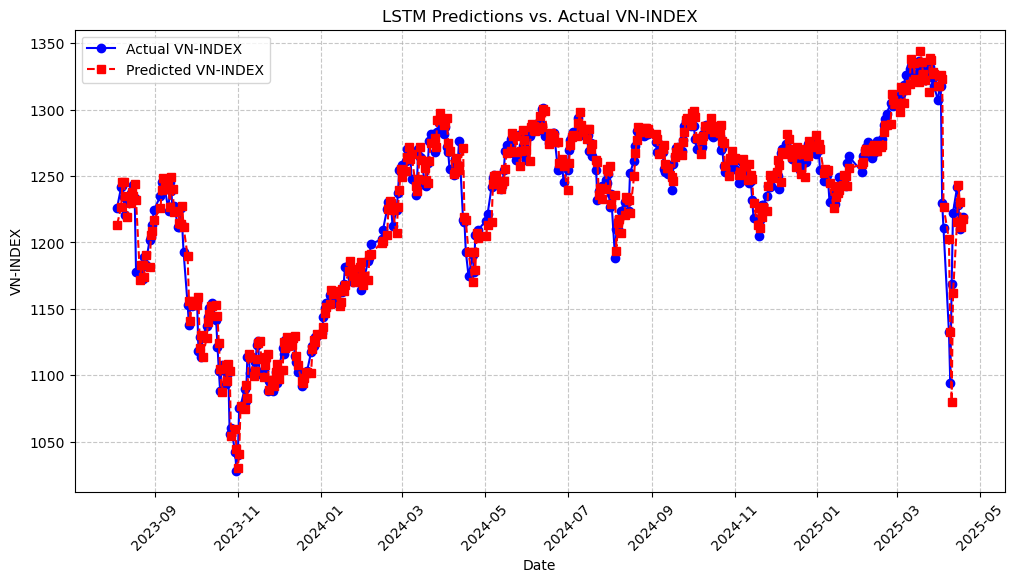

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-04          1225.98         1213.291488
1   2023-08-07          1241.42         1226.390790
2   2023-08-08          1242.23         1245.191647
3   2023-08-09          1233.99         1245.170655
4   2023-08-10          1220.61         1234.842429
..         ...              ...                 ...
420 2025-04-14          1241.44         1215.272262
421 2025-04-15          1227.79         1243.064289
422 2025-04-16          1210.30         1230.194403
423 2025-04-17          1217.25         1211.462963
424 2025-04-18          1219.12         1217.364856

[425 rows x 3 columns]


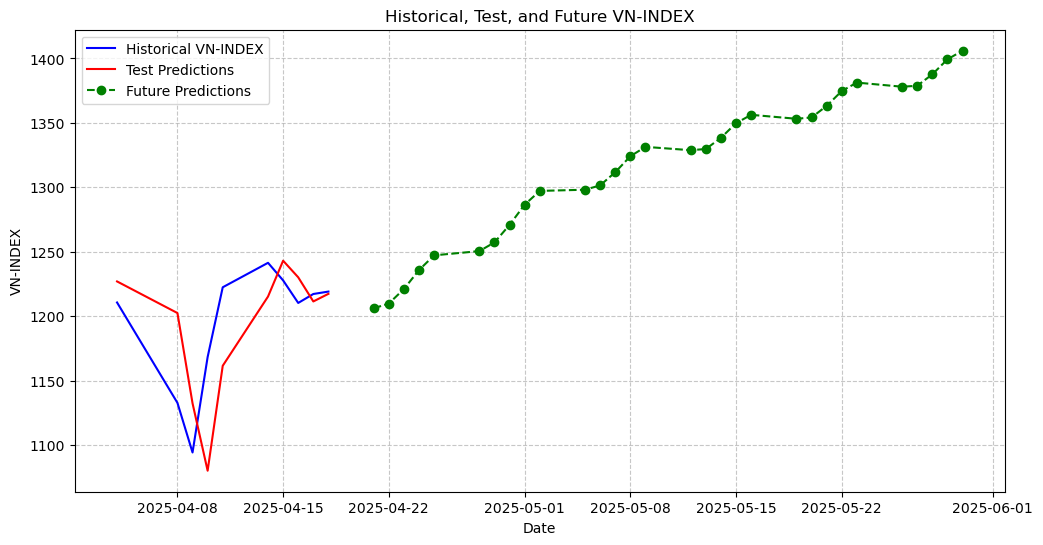

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1206.138769         -0.010648
1  2025-04-22         1209.838710          0.003068
2  2025-04-23         1221.100626          0.009309
3  2025-04-24         1235.799705          0.012038
4  2025-04-25         1247.234263          0.009253
5  2025-04-28         1250.520784          0.002635
6  2025-04-29         1257.273556          0.005400
7  2025-04-30         1270.889987          0.010830
8  2025-05-01         1286.549580          0.012322
9  2025-05-02         1297.218489          0.008293
10 2025-05-05         1298.140281          0.000711
11 2025-05-06         1301.522483          0.002605
12 2025-05-07         1311.733461          0.007845
13 2025-05-08         1324.112953          0.009438
14 2025-05-09         1331.388645          0.005495
15 2025-05-12         1328.794996         -0.001948
16 2025-05-13         1329.732091          0.000705
17 2025-05-14         1338.402950          0.006521
18 2025-05-1

In [16]:
data = df_2

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_2, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_2)

Overall Average Training Loss: 0.9117
Final Evaluation Loss on Test Set: 1.1661
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-08          0.001811         0.0007
1   2023-08-09          0.000348        -0.0066
2   2023-08-10         -0.001117        -0.0108
3   2023-08-11         -0.005019         0.0095
4   2023-08-14         -0.004387         0.0038
..         ...               ...            ...
418 2025-04-14          0.010432         0.0155
419 2025-04-15         -0.011119        -0.0110
420 2025-04-16         -0.007980        -0.0142
421 2025-04-17         -0.014439         0.0057
422 2025-04-18         -0.018705         0.0015

[423 rows x 3 columns]
RMSE: 15.0583, MAE: 10.2209, R²: 0.9464, Directional Accuracy: 0.5272


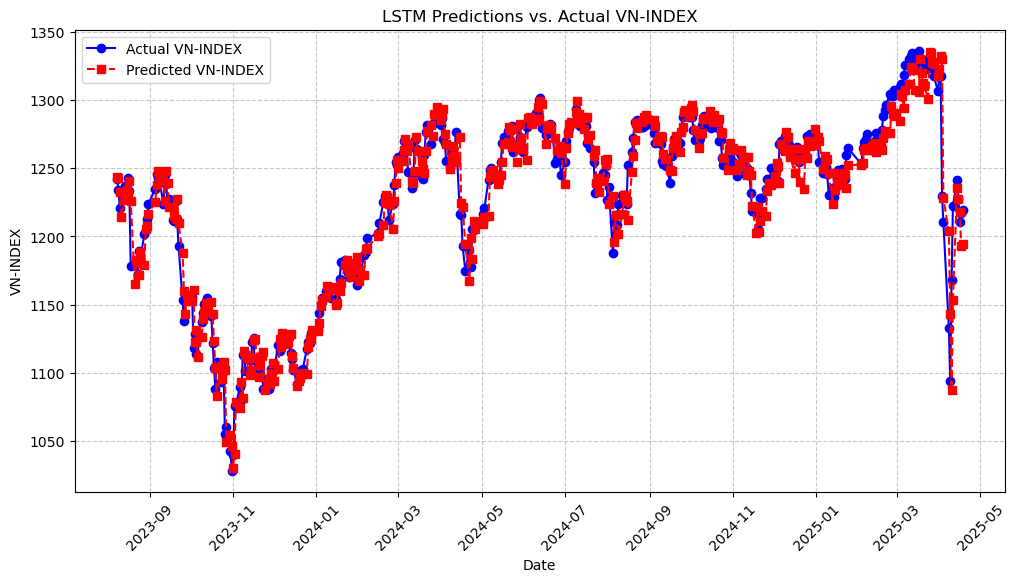

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-08          1242.23         1243.668179
1   2023-08-09          1233.99         1242.662560
2   2023-08-10          1220.61         1232.612036
3   2023-08-11          1232.21         1214.484327
4   2023-08-14          1236.84         1226.803786
..         ...              ...                 ...
418 2025-04-14          1241.44         1235.212998
419 2025-04-15          1227.79         1227.636468
420 2025-04-16          1210.30         1217.992778
421 2025-04-17          1217.25         1192.824750
422 2025-04-18          1219.12         1194.481444

[423 rows x 3 columns]


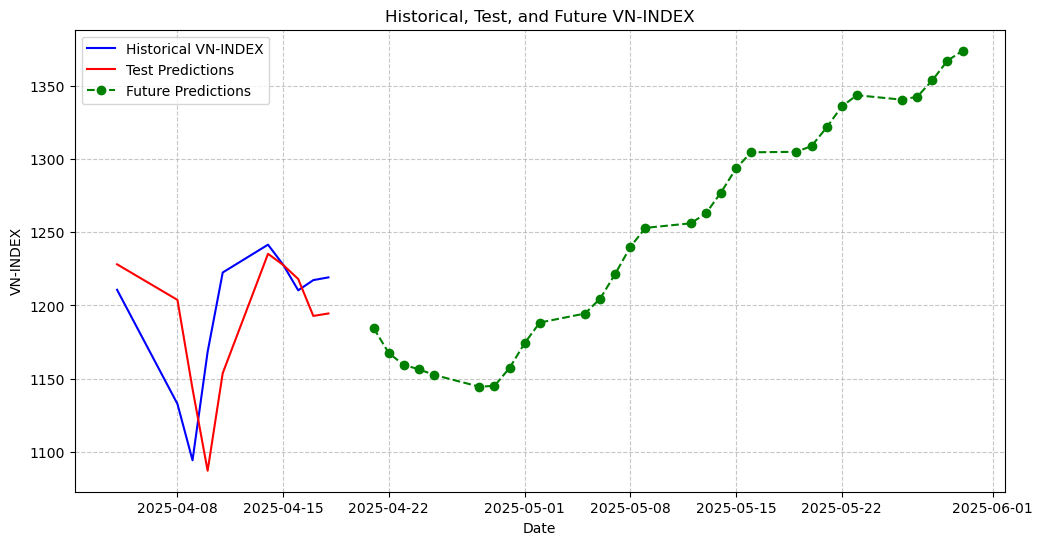

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1184.457600         -0.028432
1  2025-04-22         1167.442285         -0.014365
2  2025-04-23         1159.338414         -0.006942
3  2025-04-24         1156.372170         -0.002559
4  2025-04-25         1152.577577         -0.003281
5  2025-04-28         1144.530980         -0.006981
6  2025-04-29         1145.116930          0.000512
7  2025-04-30         1157.324561          0.010661
8  2025-05-01         1174.284367          0.014654
9  2025-05-02         1188.283753          0.011922
10 2025-05-05         1194.457181          0.005195
11 2025-05-06         1204.637285          0.008523
12 2025-05-07         1221.532681          0.014025
13 2025-05-08         1239.919097          0.015052
14 2025-05-09         1252.905266          0.010473
15 2025-05-12         1256.007338          0.002476
16 2025-05-13         1262.716059          0.005341
17 2025-05-14         1277.009136          0.011319
18 2025-05-1

In [17]:
data = lag_features_indicators(df_2, ['Change'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_2, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_2)

/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_Lag{lag}'] = copy_df[col].shift(lag)
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_Lag{lag}'] = copy_df[col].shift(lag)
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

Overall Average Training Loss: 0.7687
Final Evaluation Loss on Test Set: 0.9343
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-16         -0.001640         0.0075
1   2023-08-17         -0.002441        -0.0079
2   2023-08-18         -0.000599        -0.0450
3   2023-08-21          0.005296         0.0015
4   2023-08-22          0.007664         0.0006
..         ...               ...            ...
412 2025-04-14          0.010797         0.0155
413 2025-04-15          0.001698        -0.0110
414 2025-04-16          0.002189        -0.0142
415 2025-04-17          0.001239         0.0057
416 2025-04-18          0.001515         0.0015

[417 rows x 3 columns]
RMSE: 17.0220, MAE: 11.8172, R²: 0.9325, Directional Accuracy: 0.4844


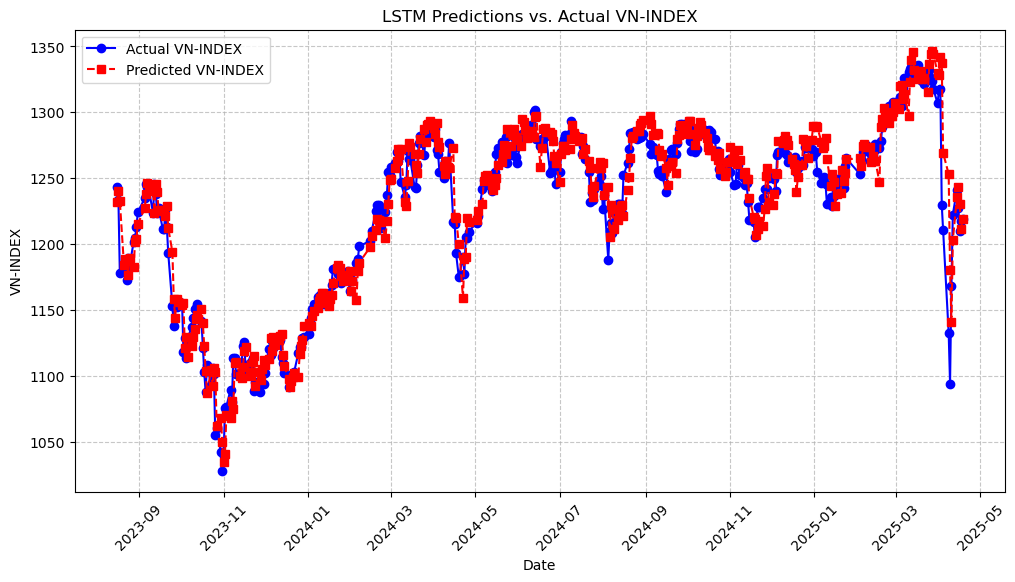

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-16          1243.26         1232.025647
1   2023-08-17          1233.48         1240.224699
2   2023-08-18          1177.99         1232.741729
3   2023-08-21          1179.76         1184.228591
4   2023-08-22          1180.49         1188.802263
..         ...              ...                 ...
412 2025-04-14          1241.44         1235.659077
413 2025-04-15          1227.79         1243.547921
414 2025-04-16          1210.30         1230.477457
415 2025-04-17          1217.25         1211.799209
416 2025-04-18          1219.12         1219.094581

[417 rows x 3 columns]


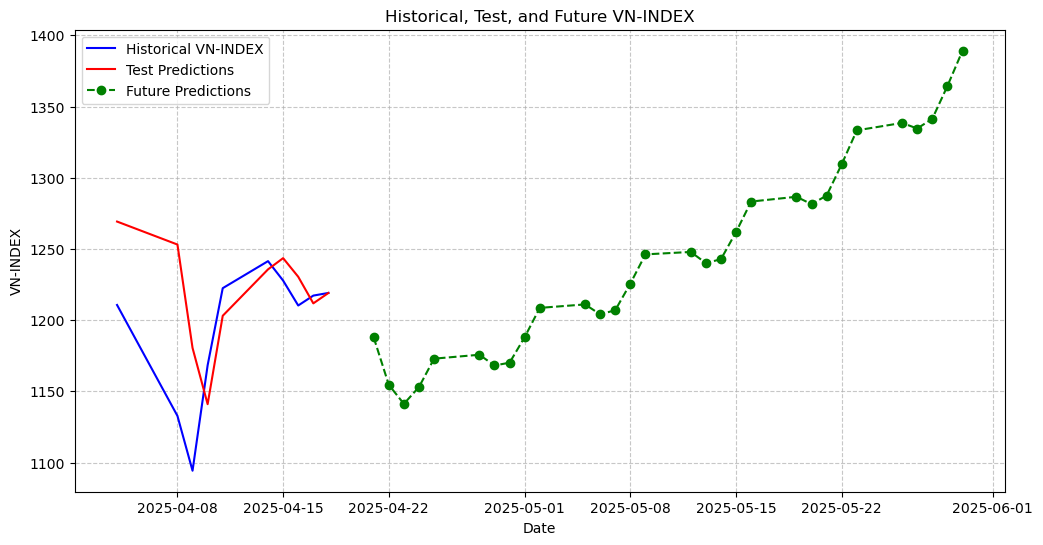

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1187.885657         -0.025620
1  2025-04-22         1154.571498         -0.028045
2  2025-04-23         1141.249793         -0.011538
3  2025-04-24         1153.081647          0.010367
4  2025-04-25         1172.979325          0.017256
5  2025-04-28         1175.722082          0.002338
6  2025-04-29         1168.200446         -0.006397
7  2025-04-30         1170.138219          0.001659
8  2025-05-01         1188.075033          0.015329
9  2025-05-02         1208.623465          0.017296
10 2025-05-05         1211.060782          0.002017
11 2025-05-06         1204.063727         -0.005778
12 2025-05-07         1207.015011          0.002451
13 2025-05-08         1225.686232          0.015469
14 2025-05-09         1246.194116          0.016732
15 2025-05-12         1247.896333          0.001366
16 2025-05-13         1240.092660         -0.006253
17 2025-05-14         1242.785071          0.002171
18 2025-05-1

In [18]:
data = lag_features_indicators(df_2, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_2, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_2)

In [19]:
# 📂 Load dataset
file_path_3 = "../ready_data/change_merged.csv"
df_3 = pd.read_csv(file_path_3)
df_3 = quicky_data(df_3)

Overall Average Training Loss: 0.9126
Final Evaluation Loss on Test Set: 1.0262
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-04          0.000031         0.0124
1   2023-08-07         -0.001250         0.0126
2   2023-08-08          0.000741         0.0007
3   2023-08-09         -0.000446        -0.0066
4   2023-08-10         -0.001437        -0.0108
..         ...               ...            ...
420 2025-04-14         -0.014110         0.0155
421 2025-04-15         -0.002408        -0.0110
422 2025-04-16          0.001734        -0.0142
423 2025-04-17          0.000582         0.0057
424 2025-04-18          0.000705         0.0015

[425 rows x 3 columns]
RMSE: 13.9782, MAE: 9.2450, R²: 0.9536, Directional Accuracy: 0.5412


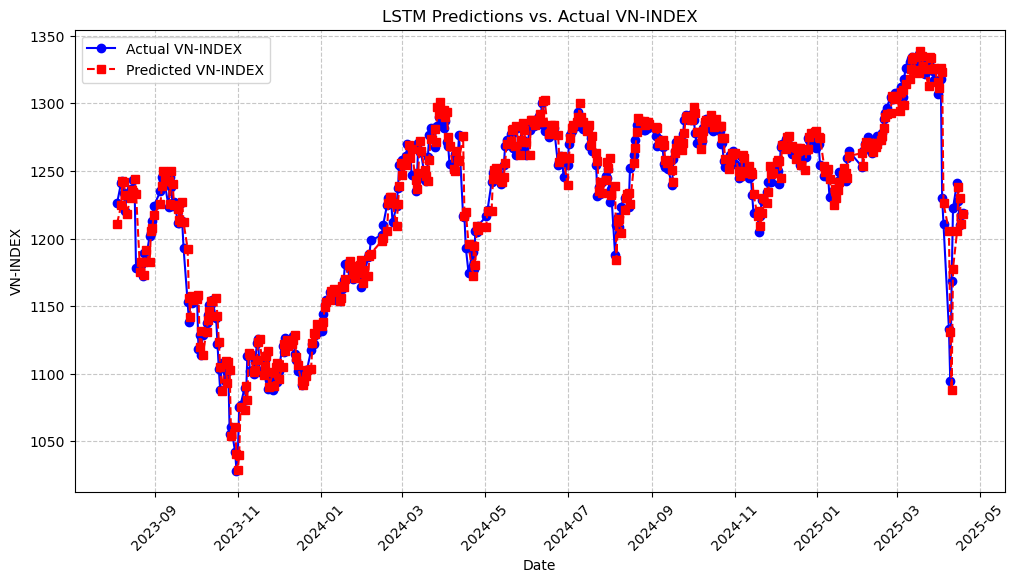

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-04          1225.98         1210.988132
1   2023-08-07          1241.42         1224.447458
2   2023-08-08          1242.23         1242.339594
3   2023-08-09          1233.99         1241.675498
4   2023-08-10          1220.61         1232.216810
..         ...              ...                 ...
420 2025-04-14          1241.44         1205.211054
421 2025-04-15          1227.79         1238.451092
422 2025-04-16          1210.30         1229.919556
423 2025-04-17          1217.25         1211.003790
424 2025-04-18          1219.12         1218.107944

[425 rows x 3 columns]


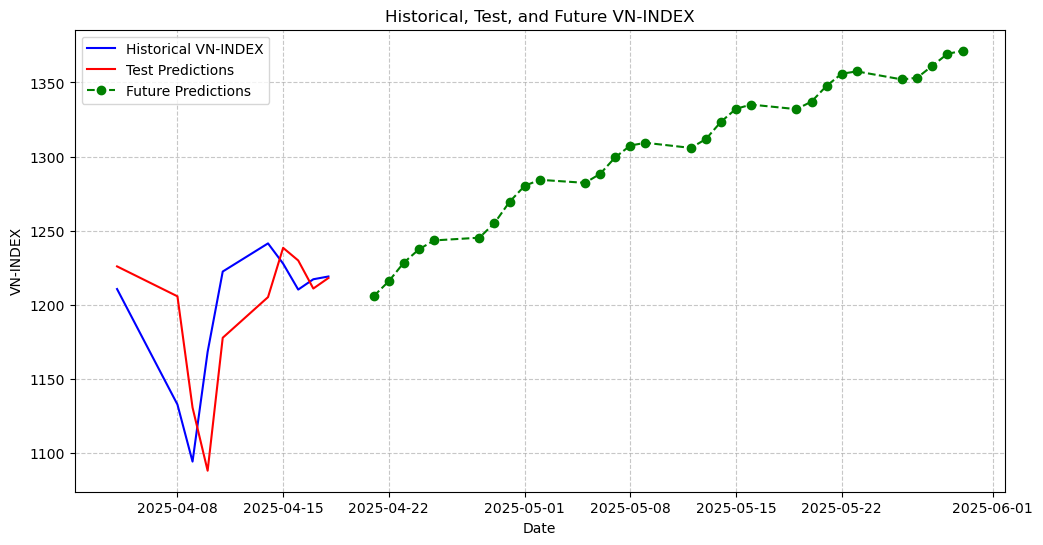

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1205.889561         -0.010852
1  2025-04-22         1215.916719          0.008315
2  2025-04-23         1228.518827          0.010364
3  2025-04-24         1237.458157          0.007277
4  2025-04-25         1243.440995          0.004835
5  2025-04-28         1245.295498          0.001491
6  2025-04-29         1255.120403          0.007890
7  2025-04-30         1269.489823          0.011449
8  2025-05-01         1280.240699          0.008469
9  2025-05-02         1284.323678          0.003189
10 2025-05-05         1282.261373         -0.001606
11 2025-05-06         1288.338780          0.004740
12 2025-05-07         1299.515949          0.008676
13 2025-05-08         1307.434479          0.006093
14 2025-05-09         1309.280358          0.001412
15 2025-05-12         1305.832307         -0.002634
16 2025-05-13         1311.722865          0.004511
17 2025-05-14         1323.425417          0.008922
18 2025-05-1

In [20]:
data = df_3

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_3)

Overall Average Training Loss: 0.9088
Final Evaluation Loss on Test Set: 0.9867
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-08         -0.004406         0.0007
1   2023-08-09          0.000687        -0.0066
2   2023-08-10          0.002833        -0.0108
3   2023-08-11          0.001309         0.0095
4   2023-08-14         -0.001364         0.0038
..         ...               ...            ...
418 2025-04-14         -0.010334         0.0155
419 2025-04-15          0.003402        -0.0110
420 2025-04-16          0.007535        -0.0142
421 2025-04-17          0.003854         0.0057
422 2025-04-18          0.002199         0.0015

[423 rows x 3 columns]
RMSE: 14.7443, MAE: 10.1049, R²: 0.9487, Directional Accuracy: 0.5414


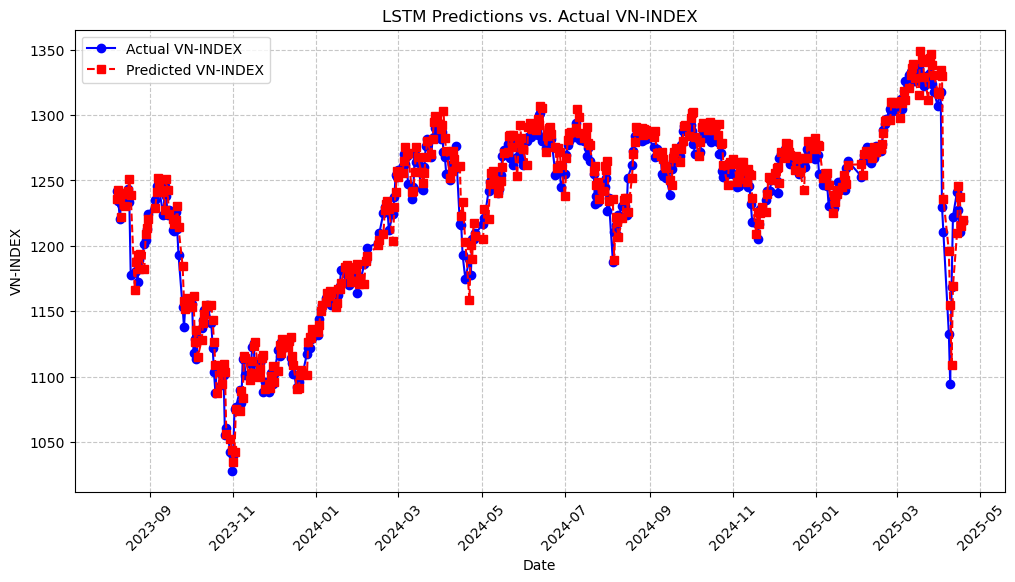

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-08          1242.23         1235.950816
1   2023-08-09          1233.99         1243.083687
2   2023-08-10          1220.61         1237.485490
3   2023-08-11          1232.21         1222.208063
4   2023-08-14          1236.84         1230.528839
..         ...              ...                 ...
418 2025-04-14          1241.44         1209.826493
419 2025-04-15          1227.79         1245.662802
420 2025-04-16          1210.30         1237.041884
421 2025-04-17          1217.25         1214.964763
422 2025-04-18          1219.12         1219.927156

[423 rows x 3 columns]


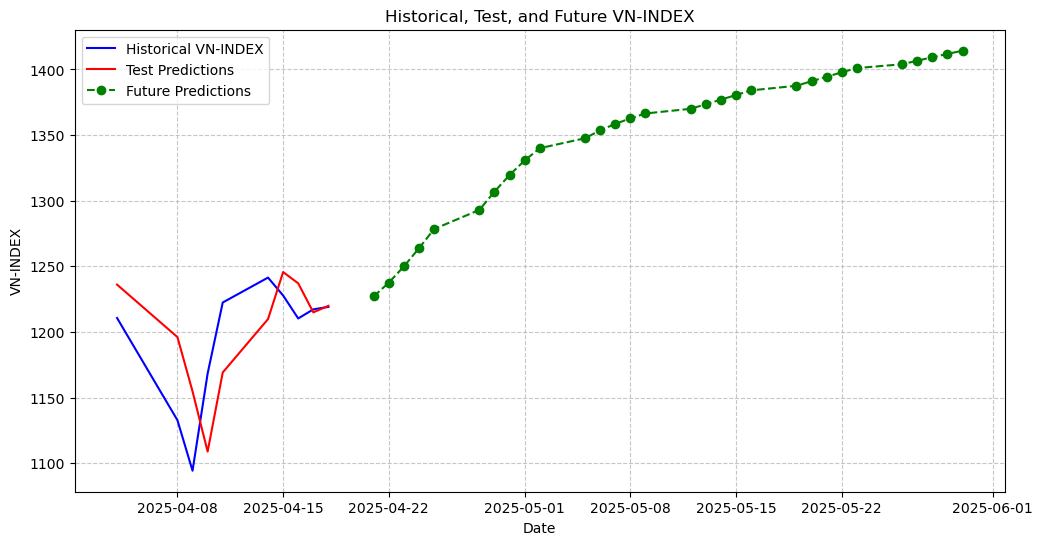

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1227.128331          0.006569
1  2025-04-22         1237.584758          0.008521
2  2025-04-23         1249.937719          0.009982
3  2025-04-24         1263.814014          0.011102
4  2025-04-25         1278.418910          0.011556
5  2025-04-28         1293.010747          0.011414
6  2025-04-29         1306.916273          0.010754
7  2025-04-30         1319.607601          0.009711
8  2025-05-01         1330.697034          0.008404
9  2025-05-02         1340.007162          0.006996
10 2025-05-05         1347.603463          0.005669
11 2025-05-06         1353.628362          0.004471
12 2025-05-07         1358.551352          0.003637
13 2025-05-08         1362.727280          0.003074
14 2025-05-09         1366.474866          0.002750
15 2025-05-12         1370.034708          0.002605
16 2025-05-13         1373.535505          0.002555
17 2025-05-14         1377.023392          0.002539
18 2025-05-1

In [21]:
data = lag_features_indicators(df_3, ['Change'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_3)

/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_Lag{lag}'] = copy_df[col].shift(lag)
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_Lag{lag}'] = copy_df[col].shift(lag)
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

Overall Average Training Loss: 0.7359
Final Evaluation Loss on Test Set: 1.0281
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-16          0.001494         0.0075
1   2023-08-17         -0.001215        -0.0079
2   2023-08-18         -0.003435        -0.0450
3   2023-08-21         -0.005790         0.0015
4   2023-08-22          0.006656         0.0006
..         ...               ...            ...
412 2025-04-14          0.019989         0.0155
413 2025-04-15          0.009755        -0.0110
414 2025-04-16          0.003079        -0.0142
415 2025-04-17          0.004732         0.0057
416 2025-04-18          0.009679         0.0015

[417 rows x 3 columns]
RMSE: 17.7049, MAE: 12.7277, R²: 0.9270, Directional Accuracy: 0.5204


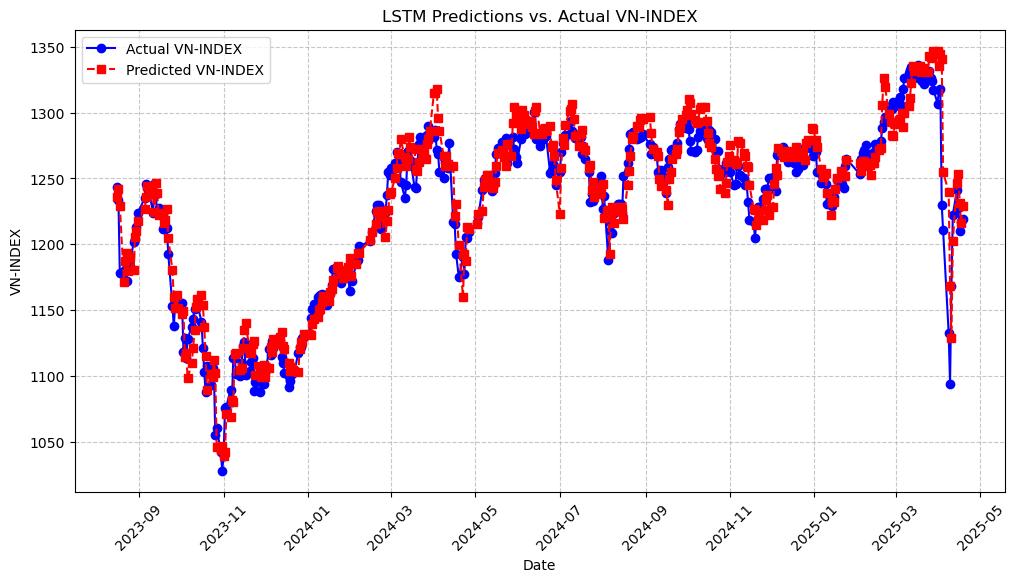

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-16          1243.26         1235.893248
1   2023-08-17          1233.48         1241.749228
2   2023-08-18          1177.99         1229.242461
3   2023-08-21          1179.76         1171.169170
4   2023-08-22          1180.49         1187.612313
..         ...              ...                 ...
412 2025-04-14          1241.44         1246.896070
413 2025-04-15          1227.79         1253.550361
414 2025-04-16          1210.30         1231.569789
415 2025-04-17          1217.25         1216.027302
416 2025-04-18          1219.12         1229.031641

[417 rows x 3 columns]


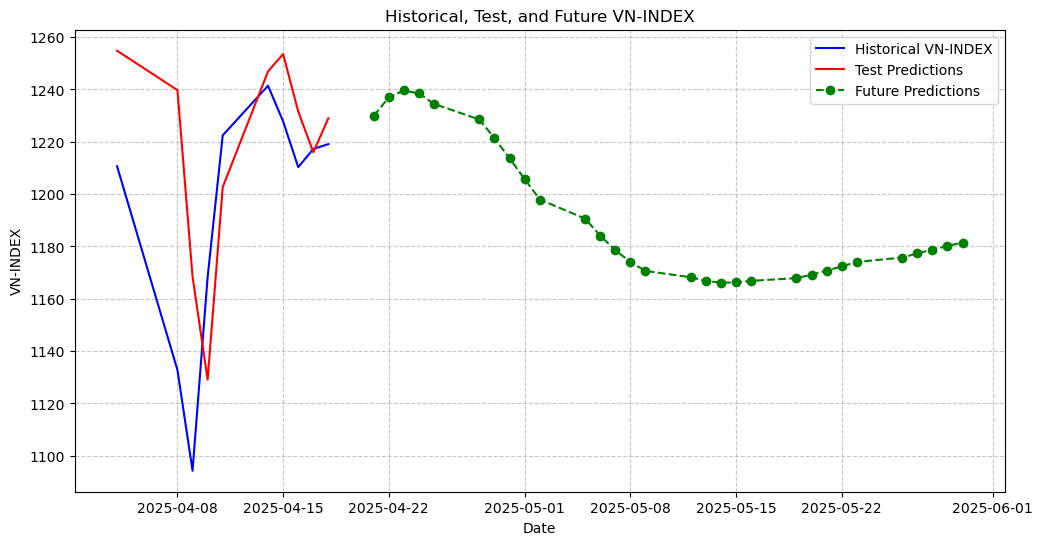

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1229.929585          0.008867
1  2025-04-22         1236.951887          0.005710
2  2025-04-23         1239.620565          0.002157
3  2025-04-24         1238.467174         -0.000930
4  2025-04-25         1234.463686         -0.003233
5  2025-04-28         1228.523506         -0.004812
6  2025-04-29         1221.383282         -0.005812
7  2025-04-30         1213.655060         -0.006327
8  2025-05-01         1205.733232         -0.006527
9  2025-05-02         1197.942960         -0.006461
10 2025-05-05         1190.643111         -0.006094
11 2025-05-06         1184.142594         -0.005460
12 2025-05-07         1178.573629         -0.004703
13 2025-05-08         1174.074788         -0.003817
14 2025-05-09         1170.645122         -0.002921
15 2025-05-12         1168.244672         -0.002051
16 2025-05-13         1166.784993         -0.001249
17 2025-05-14         1166.166893         -0.000530
18 2025-05-1

In [22]:
data = lag_features_indicators(df_3, df_3.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_3)

/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_EMA_26'] = copy_df[col].ewm(span=26, adjust=False).mean()
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:68: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_MACD'] = copy_df[f'{col}_EMA_12'] - copy_df[f'{col}_EMA_26']
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:66: PerformanceWarning: DataFrame is highly fragment

Overall Average Training Loss: 0.8837
Final Evaluation Loss on Test Set: 1.2690
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-08         -0.004514         0.0007
1   2023-08-09         -0.007592        -0.0066
2   2023-08-10         -0.002806        -0.0108
3   2023-08-11         -0.006066         0.0095
4   2023-08-14         -0.001902         0.0038
..         ...               ...            ...
418 2025-04-14         -0.016318         0.0155
419 2025-04-15         -0.012353        -0.0110
420 2025-04-16         -0.002524        -0.0142
421 2025-04-17         -0.007244         0.0057
422 2025-04-18         -0.014046         0.0015

[423 rows x 3 columns]
RMSE: 15.8500, MAE: 10.9906, R²: 0.9407, Directional Accuracy: 0.4941


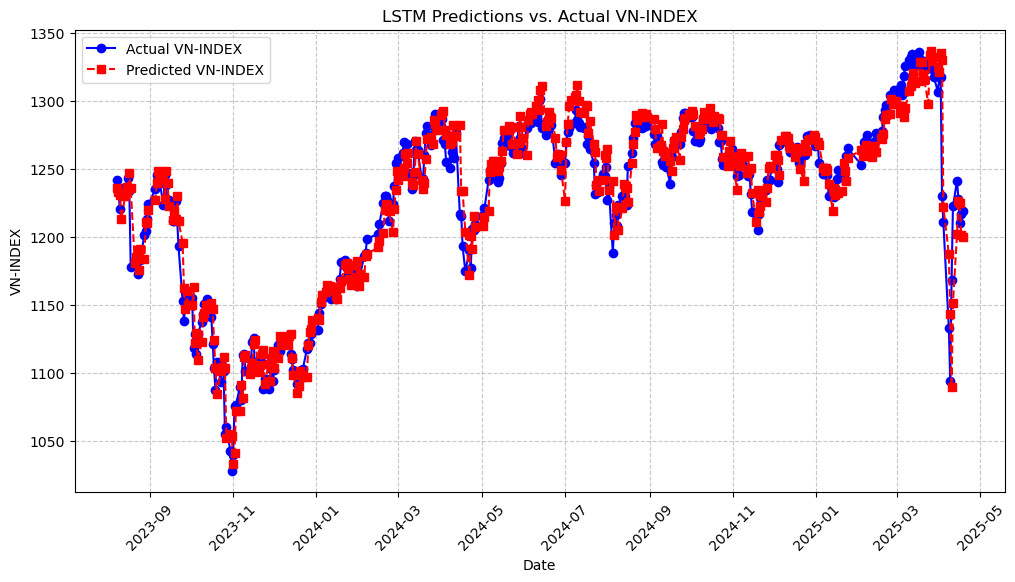

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-08          1242.23         1235.815958
1   2023-08-09          1233.99         1232.799320
2   2023-08-10          1220.61         1230.526884
3   2023-08-11          1232.21         1213.205490
4   2023-08-14          1236.84         1229.866366
..         ...              ...                 ...
418 2025-04-14          1241.44         1202.512034
419 2025-04-15          1227.79         1226.104087
420 2025-04-16          1210.30         1224.691613
421 2025-04-17          1217.25         1201.532254
422 2025-04-18          1219.12         1200.152869

[423 rows x 3 columns]


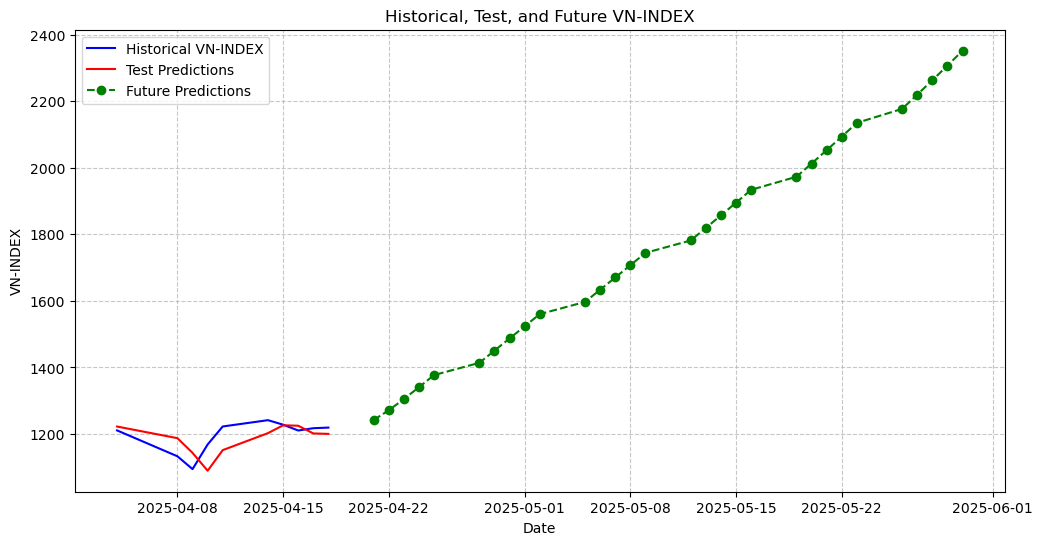

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1242.119786          0.018866
1  2025-04-22         1271.184921          0.023400
2  2025-04-23         1304.884030          0.026510
3  2025-04-24         1340.603650          0.027374
4  2025-04-25         1377.100609          0.027224
5  2025-04-28         1413.789152          0.026642
6  2025-04-29         1450.476253          0.025949
7  2025-04-30         1487.092272          0.025244
8  2025-05-01         1523.678066          0.024602
9  2025-05-02         1560.275663          0.024019
10 2025-05-05         1596.890270          0.023467
11 2025-05-06         1633.625612          0.023004
12 2025-05-07         1670.384580          0.022501
13 2025-05-08         1707.275179          0.022085
14 2025-05-09         1744.383940          0.021736
15 2025-05-12         1781.697294          0.021391
16 2025-05-13         1819.314864          0.021113
17 2025-05-14         1857.195667          0.020821
18 2025-05-1

In [23]:
data = lag_features_indicators(df_3, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_3)

/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_Lag{lag}'] = copy_df[col].shift(lag)
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_df[f'{col}_Lag{lag}'] = copy_df[col].shift(lag)
/Users/thangnguyen/Documents/GitHub/vn_index/scripts/features_engineering.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

Overall Average Training Loss: 0.7738
Final Evaluation Loss on Test Set: 1.5171
Predicted Change vs Actual Change (Test Set):
          Date  Predicted Change  Actual Change
0   2023-08-16          0.001642         0.0075
1   2023-08-17         -0.000277        -0.0079
2   2023-08-18          0.001229        -0.0450
3   2023-08-21          0.016438         0.0015
4   2023-08-22          0.016748         0.0006
..         ...               ...            ...
412 2025-04-14          0.035653         0.0155
413 2025-04-15          0.029966        -0.0110
414 2025-04-16          0.027220        -0.0142
415 2025-04-17          0.025919         0.0057
416 2025-04-18          0.025417         0.0015

[417 rows x 3 columns]
RMSE: 20.0364, MAE: 13.9165, R²: 0.9065, Directional Accuracy: 0.4988


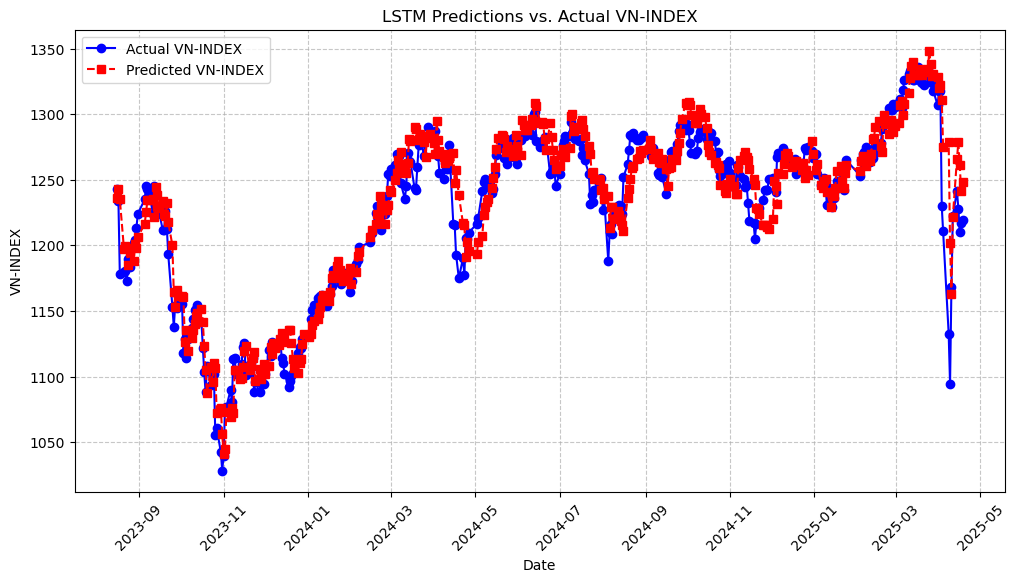

Predicted vs. Actual VN-INDEX (Test Set):
          Date  Actual VN-INDEX  Predicted VN-INDEX
0   2023-08-16          1243.26         1236.075722
1   2023-08-17          1233.48         1242.915331
2   2023-08-18          1177.99         1234.996303
3   2023-08-21          1179.76         1197.353670
4   2023-08-22          1180.49         1199.518474
..         ...              ...                 ...
412 2025-04-14          1241.44         1266.044372
413 2025-04-15          1227.79         1278.640772
414 2025-04-16          1210.30         1261.210242
415 2025-04-17          1217.25         1241.669463
416 2025-04-18          1219.12         1248.188845

[417 rows x 3 columns]


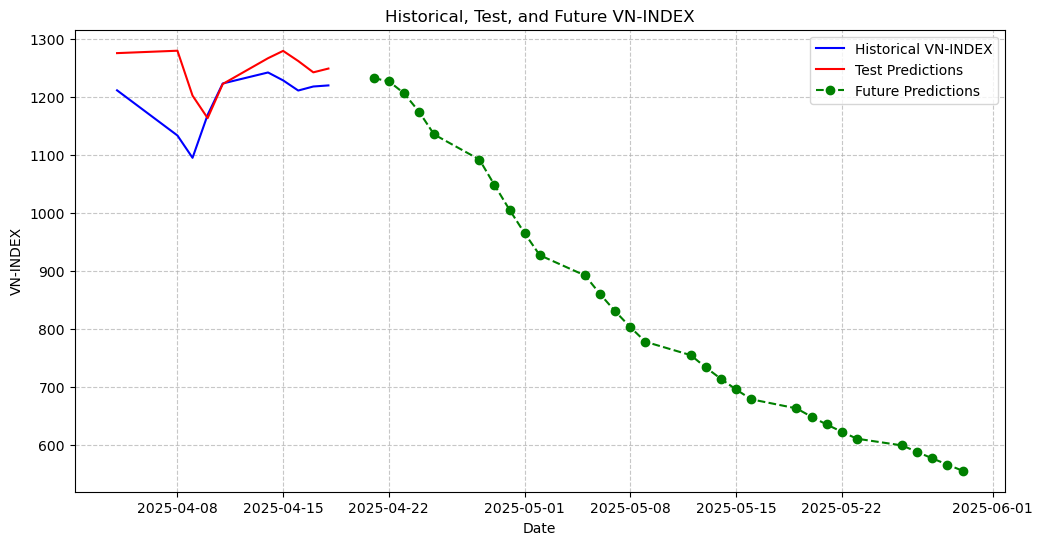

         Date  Predicted VN-INDEX  Predicted Change
0  2025-04-21         1231.606436          0.010242
1  2025-04-22         1226.240930         -0.004357
2  2025-04-23         1205.751591         -0.016709
3  2025-04-24         1173.903982         -0.026413
4  2025-04-25         1134.559111         -0.033516
5  2025-04-28         1091.372177         -0.038065
6  2025-04-29         1047.369753         -0.040318
7  2025-04-30         1004.567177         -0.040867
8  2025-05-01          964.092206         -0.040291
9  2025-05-02          926.362408         -0.039135
10 2025-05-05          891.422886         -0.037717
11 2025-05-06          859.201008         -0.036147
12 2025-05-07          829.543890         -0.034517
13 2025-05-08          802.241725         -0.032912
14 2025-05-09          777.137537         -0.031293
15 2025-05-12          754.056126         -0.029701
16 2025-05-13          732.806776         -0.028180
17 2025-05-14          713.185373         -0.026776
18 2025-05-1

In [24]:
data = lag_features_indicators(df_3, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = change_model(data, df_3, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_change_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=30, df=df_3)